# Distribuciones de Probabilidad Aplicadas a Machine Learning

En este Notebook se exploran algunas de las distribuciones de probabilidad más importantes en el contexto de Machine Learning. Las distribuciones de probabilidad describen la forma en que se distribuyen los datos y son fundamentales para entender el comportamiento de los algoritmos, para la generación de datos sintéticos y para el modelado probabilístico.

Se cubrirán los siguientes temas:

- **Conceptos teóricos**: se presentan definiciones, fórmulas y descripción de cada variable.
- **Ejemplos prácticos**: se muestran al menos tres ejemplos para distintas distribuciones.
- **Ejemplo real**: aplicación de una distribución de probabilidad en un problema real de Machine Learning (clasificación con Gaussian Naive Bayes).

¡Comencemos!

## 1. Conceptos Teóricos

Las distribuciones de probabilidad permiten modelar la incertidumbre y el comportamiento de las variables aleatorias. A continuación se presentan algunas de las distribuciones más utilizadas:

### a) Distribución Normal (Gaussiana)

La **distribución normal** es una de las más importantes y se define por la siguiente función de densidad de probabilidad:

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

donde:

- **\( \mu \)** es la media de la distribución.
- **\( \sigma \)** es la desviación estándar, que indica la dispersión de los datos.

### b) Distribución Uniforme

La **distribución uniforme** se caracteriza por tener la misma probabilidad para todos los valores en un intervalo \([a, b]\). Su función de densidad es:

$$
f(x) = \begin{cases}
\frac{1}{b-a} & \text{si } a \leq x \leq b \
0 & \text{en otro caso}
\end{cases}
$$

donde:

- **\( a \)** es el límite inferior del intervalo.
- **\( b \)** es el límite superior del intervalo.

### c) Distribución Exponencial

La **distribución exponencial** se utiliza para modelar el tiempo entre eventos en un proceso de Poisson. Su función de densidad es:

$$
f(x) = \lambda \exp(-\lambda x) \quad \text{para } x \geq 0
$$

donde:

- **\( \lambda \)** es la tasa de ocurrencia de eventos.

Estas distribuciones son ampliamente utilizadas en Machine Learning para modelar datos, estimar parámetros y generar simulaciones.

## 2. Ejemplos Prácticos en Python

A continuación se muestran tres ejemplos prácticos para generar y visualizar muestras de las distribuciones de probabilidad descritas.

### Ejemplo 1: Distribución Normal

Generamos datos que siguen una distribución normal con media \(\mu = 0\) y desviación estándar \(\sigma = 1\).

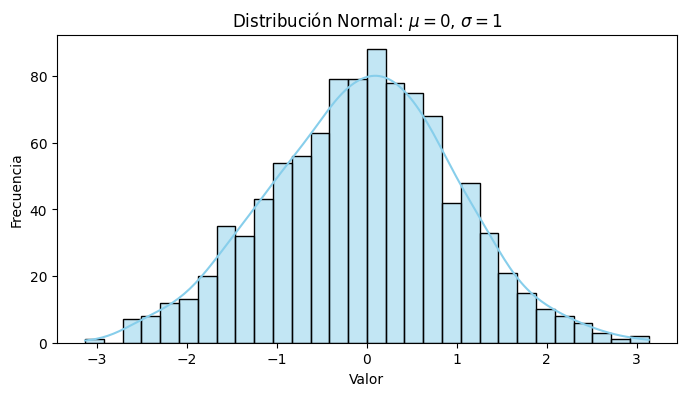

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parámetros para la distribución normal
mu, sigma = 0, 1

# Generar 1000 muestras
datos_normal = np.random.normal(mu, sigma, 1000)

# Visualizar la distribución
plt.figure(figsize=(8, 4))
sns.histplot(datos_normal, bins=30, kde=True, color='skyblue')
plt.title('Distribución Normal: $\mu=0$, $\sigma=1$')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

### Ejemplo 2: Distribución Uniforme

Generamos datos de una distribución uniforme en el intervalo \([a, b]\) con \(a = 0\) y \(b = 10\).

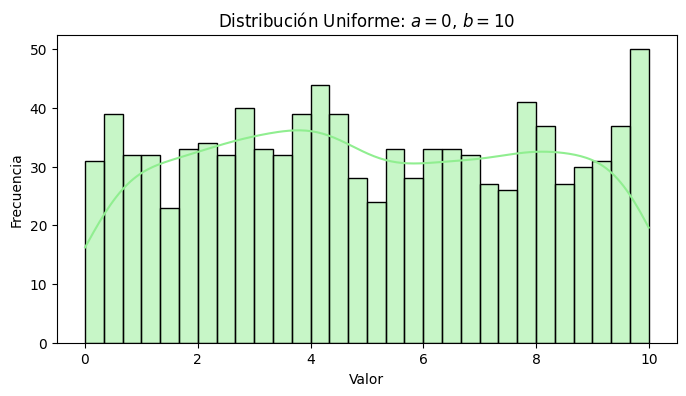

In [10]:
# Parámetros para la distribución uniforme
a, b = 0, 10

# Generar 1000 muestras
datos_uniforme = np.random.uniform(a, b, 1000)

# Visualizar la distribución
plt.figure(figsize=(8, 4))
sns.histplot(datos_uniforme, bins=30, kde=True, color='lightgreen')
plt.title('Distribución Uniforme: $a=0$, $b=10$')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

### Ejemplo 3: Distribución Exponencial

Generamos datos de una distribución exponencial con tasa \(\lambda = 1.5\).

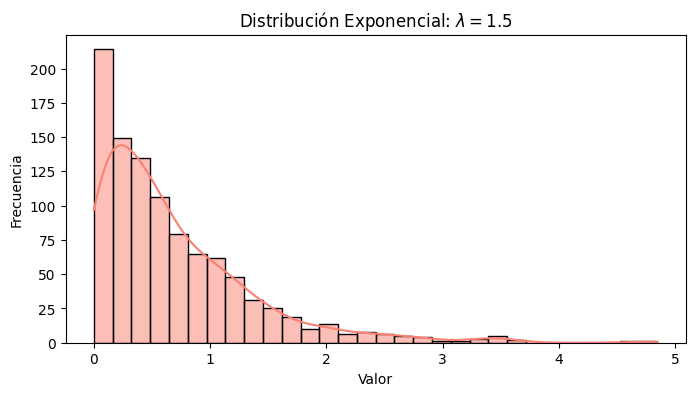

In [11]:
# Parámetro para la distribución exponencial
lambda_param = 1.5

# Generar 1000 muestras
datos_exponencial = np.random.exponential(1/lambda_param, 1000)

# Visualizar la distribución
plt.figure(figsize=(8, 4))
sns.histplot(datos_exponencial, bins=30, kde=True, color='salmon')
plt.title('Distribución Exponencial: $\lambda=1.5$')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

## 3. Ejemplo Real Aplicado a Machine Learning: Gaussian Naive Bayes

En este ejemplo se utilizará el dataset **Iris** y se aplicará el clasificador **Gaussian Naive Bayes**. Este clasificador asume que las características siguen una distribución normal, lo cual es un caso práctico de aplicación de distribuciones de probabilidad en Machine Learning.

### Pasos:

1. Cargar el dataset Iris.
2. Dividir los datos en entrenamiento y prueba.
3. Entrenar el modelo Gaussian Naive Bayes.
4. Evaluar el rendimiento del modelo.

Precisión del modelo Gaussian Naive Bayes: 0.978

Media estimada (manual) para 'sepal length (cm)' de la clase 0: 4.965
Desviación estándar estimada (manual) para 'sepal length (cm)' de la clase 0: 0.335


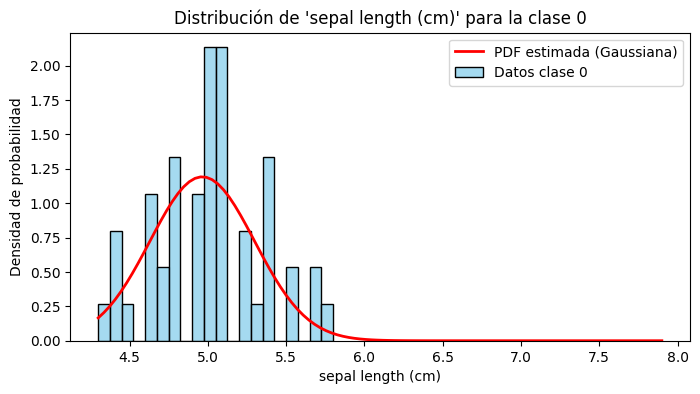

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from scipy.stats import norm

# ------------------------------
# 1. Cargar y preparar el dataset Iris
# ------------------------------
iris = datasets.load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target

# Dividir el dataset en características (X) y variable objetivo (y)
X = df_iris[iris.feature_names]
y = df_iris['target']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# ------------------------------
# 2. Entrenar el clasificador Gaussian Naive Bayes
# ------------------------------
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Realizar predicciones
y_pred = gnb.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo Gaussian Naive Bayes: {precision:.3f}')

# ------------------------------
# 3. Calcular manualmente la media y la desviación estándar para "sepal length (cm)" de la clase 0
# ------------------------------
# Seleccionar la clase 0 y la característica "sepal length (cm)"
class_index = 0       # Clase 0 (Iris-setosa)
feature_index = 0     # "sepal length (cm)" es la primera característica

# Filtrar los datos de entrenamiento para la clase 0
X_train_class0 = X_train[y_train == class_index].values

# Calcular la media y la desviación estándar manualmente
mu_est = np.mean(X_train_class0[:, feature_index])
sigma_est = np.std(X_train_class0[:, feature_index])
print(f"\nMedia estimada (manual) para 'sepal length (cm)' de la clase 0: {mu_est:.3f}")
print(f"Desviación estándar estimada (manual) para 'sepal length (cm)' de la clase 0: {sigma_est:.3f}")

# ------------------------------
# 4. Graficar la distribución de probabilidad estimada
# ------------------------------
# Generar un rango de valores basado en los datos reales
x_vals = np.linspace(df_iris['sepal length (cm)'].min(),
                     df_iris['sepal length (cm)'].max(), 100)

# Calcular la función de densidad de probabilidad (PDF) utilizando la distribución normal
pdf_vals = norm.pdf(x_vals, loc=mu_est, scale=sigma_est)

# Filtrar los datos reales para la clase 0
data_class0 = df_iris[df_iris['target'] == class_index]['sepal length (cm)']

# Graficar el histograma de los datos y la PDF estimada
plt.figure(figsize=(8, 4))
sns.histplot(data_class0, bins=20, stat='density', color='skyblue', label='Datos clase 0')
plt.plot(x_vals, pdf_vals, color='red', lw=2, label='PDF estimada (Gaussiana)')
plt.title("Distribución de 'sepal length (cm)' para la clase 0")
plt.xlabel("sepal length (cm)")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.show()



## Conclusión

En este Notebook se han explorado diversas **distribuciones de probabilidad** que son fundamentales en el análisis de datos y Machine Learning:

- La **distribución normal (gaussiana)**, utilizada para modelar datos simétricos en torno a una media.
- La **distribución uniforme**, en la cual todos los valores tienen la misma probabilidad dentro de un intervalo.
- La **distribución exponencial**, que modela el tiempo entre eventos en procesos de Poisson.

Además, se mostró un ejemplo real aplicado a Machine Learning utilizando **Gaussian Naive Bayes** en el dataset Iris, aprovechando la asunción de que las características se distribuyen normalmente. La correcta comprensión y aplicación de las distribuciones de probabilidad es crucial para:

- La generación de datos sintéticos.
- La estimación de parámetros y la inferencia estadística.
- El diseño y entrenamiento de modelos probabilísticos.

¡Experimenta con estos conceptos y aplica estos métodos a tus propios proyectos para mejorar el análisis y modelado de datos!